In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt


In [2]:
# Download beetrove data from https://github.com/beetrove/openai-gpts-data

# Specifically
# GPTs_Authors.csv: https://drive.google.com/uc?export=download&id=1TSMO-SEwtANPtShjgb4JErOXV69e9EWw
# GPTs_Details.csv: https://drive.google.com/uc?export=download&id=1tb8qZr_PFhXSJ4sQV37IsqsjKK61g5IS
        

In [3]:
# Load data from disk

gpts_details = pd.read_csv('beetrove/GPTs_Details.csv')
gpts_details['GPT Creation Datetime'] = pd.to_datetime(gpts_details['GPT Creation Datetime'])
gpts_details['GPT Update Datetime'] = pd.to_datetime(gpts_details['GPT Update Datetime'])

In [4]:
gpts_details.head(10)

,Last crawled date,Author User Id,GPT Id,GPT Category,GPT Url,GPT Name,GPT Conversations,GPT Avg Stars,GPT Total Reviews,GPT Total Stars,...,GPT Logo Image URL,GPT Sharing Method,GPT Prompt Starter 1,GPT Prompt Starter 2,GPT Prompt Starter 3,GPT Prompt Starter 4,GPT Tags,GPT Capabilities Types,GPT Capabilities Actions Details,GPT Capabilities Actions Domains
0,2024-03-19,user-8UW0V9Gz998stjOgOVMwXVIh,g-pmuQfob8d,dalle,https://chat.openai.com/g/g-pmuQfob8d-image-ge...,image generator,3000000,3.61,82738.0,298811.0,...,https://files.oaiusercontent.com/file-M1df4Ab7...,marketplace,Generate an image of a futuristic city.,Create a portrait of a fictional character.,Design a logo for a new tech startup.,Illustrate a scene from a fantasy novel.,"public,reportable","browser,dalle",NaN,NaN
1,2024-03-19,user-PrioK3AN9UNCA9WGNw14PE7j,g-bo0FiWLY7,research,https://chat.openai.com/g/g-bo0FiWLY7-consensus,Consensus,3000000,4.25,30341.0,128831.0,...,https://files.oaiusercontent.com/file-uUsDBz1A...,marketplace,Is sauna good for heart health?,Draft a blog on science-backed benefits of min...,Write the introduction of a paper on the effec...,Does fish oil improve mood? Only use human RCT...,"public,reportable,uses_function_calls","browser,dalle,plugins_prototype,python","[\n {\n ""id"": ""gzm_cnf_Sp7WUrL1WlUCQROHMEO...",chat.consensus.app
2,2024-03-19,user-Yir1x5PJ8joAOlCh3NFgthdz,g-gFt1ghYJl,dalle,https://chat.openai.com/g/g-gFt1ghYJl-logo-cre...,Logo Creator,1000000,3.52,39327.0,138375.0,...,https://files.oaiusercontent.com/file-dqdS1PEG...,marketplace,Generate me a logo featuring an ice cream,Make me an app icon for an RPG adventure game,NaN,NaN,"public,reportable","browser,dalle,python",NaN,NaN
3,2024-03-19,user-QtjA7tnG6FEAwS6ohL1lGpVm,g-alKfVrz9K,productivity,https://chat.openai.com/g/g-alKfVrz9K-canva,Canva,1000000,3.23,15817.0,51014.0,...,https://files.oaiusercontent.com/file-6qPLxHx8...,marketplace,How about an inspirational quote graphic for s...,I need a poster for our online store’s seasona...,Make an Instagram post about a breathtaking su...,Highlight my favorite hiking trail in a Facebo...,"public,reportable,uses_function_calls",plugins_prototype,"[\n {\n ""id"": ""gzm_cnf_1OMhzVMWuJar3ToH3g2...",chatgpt-plugin.canva.com
4,2024-03-19,user-GsrmFxnwdhzKPBumBHe4oeR1,g-gFFsdkfMC,dalle,https://chat.openai.com/g/g-gFFsdkfMC-cartooni...,Cartoonize Yourself,1000000,3.46,14729.0,51025.0,...,https://files.oaiusercontent.com/file-bUZE1j8L...,marketplace,I'd like to upload a picture of my pet,I'd like to upload a selfie,I'd like to upload a picture of my friends/family,I'd like to upload a custom picture,"public,reportable","browser,dalle,python",NaN,NaN
5,2024-03-19,user-qcK7n3IbKhYmu4dSv3kkiut3,g-B3hgivKK9,writing,https://chat.openai.com/g/g-B3hgivKK9-write-fo...,Write For Me,1000000,4.21,34761.0,146453.0,...,https://files.oaiusercontent.com/file-hVjI65nZ...,marketplace,Write me a 1000 word analysis on the future of...,Write me a 200 word product description for a ...,Write a 3000 word blog about the future of SEO...,Write a five paragraph essay on brutalist arch...,"public,reportable","browser,dalle,python",NaN,NaN
6,2024-03-19,user-xNvKxI7DzdHAjr6LBbhCDWKi,g-n7Rs0IK86,programming,https://chat.openai.com/g/g-n7Rs0IK86-grimoire,Grimoire,1000000,4.40,13484.0,59369.0,...,https://files.oaiusercontent.com/file-0iw1nJRF...,marketplace,Write code to...,"Create your 1st website! Pt1.md, 2: Link in Bi...",📖 P Learn to prompt-gram. Open Grimoire.md Rea...,"⚠ R to Readme.md & Tutorial, show K","public,reportable,uses_function_calls","browser,dalle,plugins_prototype,python","[\n {\n ""id"": ""gzm_cnf_RSrFhVScLOPFj53jpwd...",app.netlify.com
7,2024-03-19,user-9rCcq3yoxFRErAkvkOdjeqtF,g-V2KIUZSj0,productivity,https://chat.openai.com/g/g-V2KIUZSj0-pdf-ai-pdf,PDF Ai PDF,900000,4.20,11453.0,48056.0,...,https://files.oaiusercontent.com/file-9XepYndx...,marketplace,START HERE: HOW TO UPLOAD A FILE,How's AI PDF different ?,Search the U.S. Budget for Artificial 

In [5]:
len(gpts_details)

334348

In [6]:
gpts_details.loc[3]

Last crawled date                                                          2024-03-19
Author User Id                                          user-QtjA7tnG6FEAwS6ohL1lGpVm
GPT Id                                                                    g-alKfVrz9K
GPT Category                                                             productivity
GPT Url                                   https://chat.openai.com/g/g-alKfVrz9K-canva
GPT Name                                                                        Canva
GPT Conversations                                                             1000000
GPT Avg Stars                                                                    3.23
GPT Total Reviews                                                             15817.0
GPT Total Stars                                                               51014.0
GPT Description                     Effortlessly design anything: presentations, l...
GPT Creation Date                                     

In [7]:
# Load data from disk

gpts_authors = pd.read_csv('beetrove/GPTs_Authors.csv')

gpts_authors = gpts_authors[gpts_authors['Author is Verified']]

gpts_authors

,Last crawled date,Author User Id,Author Organization Id,Author Workspace Id,Author Display Type,Author Name,Author Site,Author is Verified,Author LinkedIn,Author Twitter,Author GitHub,Author Offers Email Support
0,2024-03-19,user-kAET33Y2oFw3W9uPbApkY5Vs,org-cRUU4a4HU0Fm4gY6X7Sbufwr,NaN,name,YI YING WU,NaN,True,NaN,NaN,NaN,NaN
1,2024-03-19,user-ErhKsKEbPfUobtJgzPIK8avD,org-2JJnl5xfFm6d1c9FErrB1YQT,NaN,name,DAICHI MURAOKA,NaN,True,NaN,NaN,NaN,NaN
2,2024-03-19,user-5PFBhns8jwsLn8q2NjxVlHlu,org-amJiaVixRZYnbkDUmTBPJeVs,NaN,name,SUN LIFA,NaN,True,NaN,NaN,NaN,NaN
3,2024-03-19,user-HzSfwCYDx4RTPwKpFzPqTqsh,org-Td8tfAtosshkjZAQhujkDbZH,NaN,name,莊正旺,NaN,True,NaN,NaN,NaN,True
4,2024-03-19,user-gont0VML2GYv1Jx85FMQYAGh,org-pQjsaBu3DfewK0fhoQnKbJ7U,NaN,website,ai-sns.com,https://ai-sns.com,True,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
131031,2024-01-20,user-zmkvN6PrOAHYnQrd62H12AMB,org-oyvmjERYbsY8QbzRR9R8v1fn,NaN,name,Jesus Garcia,NaN,True,NaN,NaN,NaN,True
131032,2024-01-20,user-SG1w8fZAMdxZFuR9xBG3iWRd,org-LMyXvG7mYQrDjEnJOtLl2E8q,NaN,website,degree.no,https://degree.no,True,NaN,NaN,NaN,NaN
131033,2024-01-20,user-W1cQYE0Pvop2mUdID8x2KCP9,org-SpVo9pIhZasknHLSaecBpwD8,NaN,name,KEVIN ERIK IIN,NaN,True,NaN,NaN,NaN,NaN
131034,2024-01-20,user-DbEjvw6p10UThE2IISr9EDpF,org-tCprDPkAP6cWMK1oAiNgKOlB,NaN,name,Josef Taha,NaN,True,NaN,NaN,NaN,NaN


# Analysis

## Authors and submitted GPTs

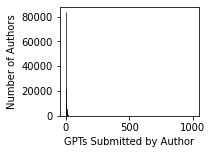

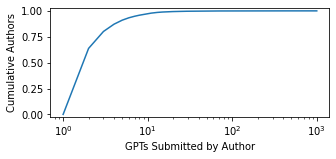

10
131022


In [8]:
# Number of submitted GPTs per author
data = gpts_details.groupby('Author User Id')['Author User Id'].size().values


# Define the bins
bins = np.arange(0, 1000, 1)  # Define your bin range here

# Compute the histogram
hist, bin_edges = np.histogram(data, bins=bins, density=True)

# Calculate the CDF
cdf = np.cumsum(hist * np.diff(bin_edges))

# Plot the Hist
plt.figure(figsize=(2.5,2))
plt.hist(data, bins=bins, edgecolor='black', alpha=0.7)
plt.xlabel('GPTs Submitted by Author')
plt.ylabel('Number of Authors')
plt.savefig("plots/hist_gpts_perauthor.pdf", bbox_inches='tight')

plt.show()


# Plot the CDF
plt.figure(figsize=(5,2))
plt.plot(bin_edges[1:], cdf)
plt.ylim(-0.025, 1.025)
plt.xlabel('GPTs Submitted by Author')
plt.ylabel('Cumulative Authors')
plt.xscale('log')
plt.savefig("plots/cdf_gpts_perauthor.pdf", bbox_inches='tight')

plt.show()


print(sum(gpts_details.groupby('Author User Id')['Author User Id'].size().sort_values() > 1000))
print(len(gpts_details.groupby('Author User Id')['Author User Id'].size()))

## GPTs and conversations

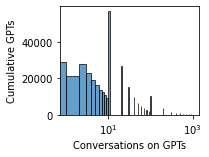

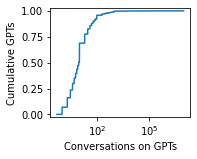

95318
334348
0.2850861976144616


In [9]:
data = gpts_details['GPT Conversations'].values

# Define the bins
min_value = 0.5  # Minimum value
max_value = 10000000  # Maximum value

# Number of bins
num_bins = 100000

# Calculate logarithmic bin edges
log_min = np.log10(min_value)
log_max = np.log10(max_value)
log_edges = np.logspace(log_min, log_max, num_bins + 1)

# Compute the histogram
hist, bin_edges = np.histogram(data, bins=log_edges, density=True)

# Calculate the CDF
cdf = np.cumsum(hist * np.diff(bin_edges))

# Plot the Hist
plt.figure(figsize=(2.5,2))
plt.hist(data, bins=bins, edgecolor='black', alpha=0.7)
plt.xlabel('Conversations on GPTs')
plt.ylabel('Cumulative GPTs')
plt.xscale('log')
# plt.savefig("plots/hist_gpts_comments.pdf", bbox_inches='tight')
plt.show()

# Plot the CDF
plt.figure(figsize=(2.5,2))
plt.plot(bin_edges[1:], cdf)
plt.xlabel('Conversations on GPTs')
plt.ylabel('Cumulative GPTs')
plt.ylim(-0.025, 1.025)
plt.xscale('log')
plt.savefig("plots/cdf_gpts_comments.pdf", bbox_inches='tight')

plt.show()

print(sum(gpts_details['GPT Conversations'] > 10))
print(len(gpts_details['GPT Conversations']))
print(sum(gpts_details['GPT Conversations'] > 10)/len(gpts_details['GPT Conversations']))


In [10]:
top_convo = sum(gpts_details['GPT Conversations'].sort_values(ascending=False).head(12))

total_convo = sum(gpts_details['GPT Conversations'].sort_values(ascending=False))

print(top_convo)
print(total_convo)
print(1.0*top_convo/total_convo)

print(100* 12/334348)

14700000
43644948
0.3368087413003677
0.003589074856137916


## Ratings and Number of Ratings

In [11]:
data

array([3000000, 3000000, 1000000, ...,       0,       0,       0])

Number of no rating GPTs: 303545
Number of rated GPTs: 30803
Percent Rated: 9.2129%
Percent Unrated: 90.7871%
Average  Rating: 4.13


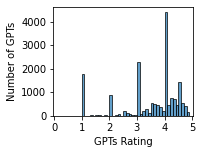

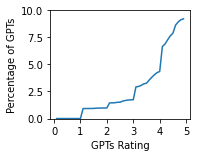

In [12]:
import matplotlib.ticker as plticker



_data = gpts_details['GPT Avg Stars']
# _data.loc[_data.isna()] = 0
data = _data.values

print('Number of no rating GPTs:', sum(_data.isna()))
print('Number of rated GPTs:', len(_data) - sum(_data.isna()))
rated_percentage = ((len(_data) - sum(_data.isna()))/ len(_data))*100
print(f'Percent Rated: {rated_percentage:.4f}%')
print(f'Percent Unrated: {100-rated_percentage:.4f}%')


print(f'Average  Rating: {_data[_data.isna() == False].mean():.2f}')


# Define the bins
bins = np.arange(0, 5, 0.1)  # Define your bin range here

# Compute the histogram
hist, bin_edges = np.histogram(data, bins=bins, density=True)

# Calculate the CDF
cdf = np.cumsum(hist * np.diff(bin_edges))

# Plot the Hist
plt.figure(figsize=(2.5,2))
plt.hist(data, bins=bins, edgecolor='black', alpha=0.7)
plt.xlim(-0.025, 5.025)
loc = plticker.MultipleLocator(base=1.0) # this locator puts ticks at regular intervals
ax = plt.gca()
ax.xaxis.set_major_locator(loc)
plt.xlabel('GPTs Rating')
plt.ylabel('Number of GPTs')
# plt.savefig("plots/hist_ratings_gpts.pdf", bbox_inches='tight')
plt.show()

# # Plot the CDF
plt.figure(figsize=(2.5,2))
plt.plot(bin_edges[1:], cdf*rated_percentage)
loc = plticker.MultipleLocator(base=1.0) # this locator puts ticks at regular intervals
ax = plt.gca()
ax.xaxis.set_major_locator(loc)
plt.xlabel('GPTs Rating')
plt.ylabel('Percentage of GPTs')
plt.ylim(-0.025, 10.025)
plt.savefig("plots/cdf_ratings_gpts.pdf", bbox_inches='tight')

plt.show()

## Categories

In [13]:
# Analyze Categories
gpts_details.loc[gpts_details['GPT Category'].isna(), 'GPT Category'] = "none"
categories = gpts_details['GPT Category'].apply(str.title)

cat_arr = np.array(list(zip(*np.unique(categories, return_counts=True))))

print(cat_arr)

[['Dalle' '4639']
 ['Education' '19572']
 ['Lifestyle' '20474']
 ['None' '152539']
 ['Other' '88276']
 ['Productivity' '18588']
 ['Programming' '8288']
 ['Research' '12159']
 ['Writing' '9813']]


In [14]:
cat_df = pd.DataFrame(cat_arr)
cat_df.columns = ['Category', 'Count']
cat_df['Count'] = cat_df['Count'].astype(int)
cat_df['Category'] = cat_df['Category'].apply(str.title)
cat_df['Percentages'] = 100.0 * cat_df['Count'] / cat_df['Count'].sum()

print(f"Total GPTs {cat_df['Count'].sum()}")

cat_df.sort_values('Count', ascending=False)

Total GPTs 334348


,Category,Count,Percentages
3,None,152539,45.622824
4,Other,88276,26.402431
2,Lifestyle,20474,6.123560
1,Education,19572,5.853781
5,Productivity,18588,5.559477
7,Research,12159,3.636630
8,Writing,9813,2.934966
6,Programming,8288,2.478854
0,Dalle,4639,1.387477


#### Category - Rating

In [15]:
cat_rat = gpts_details[['GPT Category', 'GPT Avg Stars']].copy()

cat_rat['GPT Category'] = gpts_details['GPT Category'].apply(str.title)

cat_rat.groupby('GPT Category').mean()

,GPT Avg Stars
GPT Category,
Dalle,3.772603
Education,4.296626
Lifestyle,4.261662
None,4.103067
Other,4.146450
Productivity,4.114241
Programming,4.075985
Research,4.068007
Writing,4.247032


## Capabilities

In [16]:
# Analyze Capabilities
capability_mapping = {
    'browser': 'Browsing',
    'dalle': 'DALL·E Images',
    'plugins_prototype': 'Actions',
    'python': 'Data Analysis',
    'none': 'Native',
}

capability_ratings = {
    'browser': [],
    'dalle': [],
    'plugins_prototype': [],
    'python': [],
    'none': [],
}

gpts_details.loc[gpts_details['GPT Capabilities Types'].isna(), 'GPT Capabilities Types'] = "none"
capabilities = gpts_details[['GPT Capabilities Types', 'GPT Avg Stars']]


capa_holder = []
for _, (capa, rating) in capabilities.iterrows():
    try:
        capa_holder.extend(capa.strip().split(','))
        
        for _capa in capa.strip().split(','):
            capability_ratings[_capa].append(rating)
    except:
        print(capa)
        assert False
    
capa_arr = np.array(list(zip(*np.unique(capa_holder, return_counts=True))))
print(capability_mapping)
print(capa_arr)

{'browser': 'Browsing', 'dalle': 'DALL·E Images', 'plugins_prototype': 'Actions', 'python': 'Data Analysis', 'none': 'Native'}
[['browser' '312898']
 ['dalle' '291188']
 ['none' '10737']
 ['plugins_prototype' '9891']
 ['python' '165339']]


In [17]:
df_capa = pd.DataFrame(capa_arr)
df_capa.columns = ['Capability', 'Count']

df_capa['Count'] = df_capa['Count'].astype(int)
df_capa['Capa'] = [capability_mapping[_capa] for _capa in df_capa['Capability']]
df_capa['Percentages'] = 100.0 * df_capa['Count'] / len(gpts_details)

df_capa[['Capa', 'Count', 'Percentages']].sort_values('Count', ascending=False)

,Capa,Count,Percentages
0,Browsing,312898,93.584529
1,DALL·E Images,291188,87.091294
4,Data Analysis,165339,49.451171
2,Native,10737,3.211325
3,Actions,9891,2.958295


#### Capability - Rating

In [18]:
for _capa in capability_ratings:
    print(f'{capability_mapping[_capa]:15s} {np.nanmean(capability_ratings[_capa], ):.2f}')

Browsing        4.13
DALL·E Images   4.13
Actions         4.02
Data Analysis   4.12
Native          4.16


In [19]:
gpts_details.head(12)[['GPT Conversations', 'GPT Capabilities Types']]

,GPT Conversations,GPT Capabilities Types
0,3000000,"browser,dalle"
1,3000000,"browser,dalle,plugins_prototype,python"
2,1000000,"browser,dalle,python"
3,1000000,plugins_prototype
4,1000000,"browser,dalle,python"
5,1000000,"browser,dalle,python"
6,1000000,"browser,dalle,plugins_prototype,python"
7,900000,"browser,dalle,plugins_prototype,python"
8,800000,"browser,dalle,plugins_prototype,python"
9,700000,"browser,dalle,plugins_prototype,python"


## Capability - Categories Intersection

In [20]:
cat_arr[:, 0]

array(['Dalle', 'Education', 'Lifestyle', 'None', 'Other', 'Productivity',
       'Programming', 'Research', 'Writing'], dtype='<U21')

In [21]:
capa_arr[:, 0]

array(['browser', 'dalle', 'none', 'plugins_prototype', 'python'],
      dtype='<U21')

In [22]:
merge_df = pd.merge(capabilities, categories, right_index=True, left_index=True)

merge_counter = {_cat: {_capa: 0 for _capa in capa_arr[:, 0]} for _cat in cat_arr[:, 0]}

for n, row in tqdm(merge_df.iterrows(), total=len(merge_df)):
    _cat = row['GPT Category']
    for _capa in row['GPT Capabilities Types'].split(','):
        merge_counter[_cat][_capa] = merge_counter[_cat][_capa] + 1

100%|████████████████████████████████| 334348/334348 [00:04<00:00, 67407.43it/s]


In [23]:
print('x-axis is the reported capabilities')
print('y-axis is the gpts categories')
cap_cat_df = pd.DataFrame.from_dict(merge_counter).transpose()

cap_cat_df.columns = [capability_mapping[_capa] for _capa in cap_cat_df.columns]
cap_cat_df.index = [_cat.title() for _cat in cap_cat_df.index]

cap_cat_df[['Browsing', 'DALL·E Images', 'Data Analysis', 'Native', 'Actions']].sort_values('Browsing', ascending=False)

x-axis is the reported capabilities
y-axis is the gpts categories


,Browsing,DALL·E Images,Data Analysis,Native,Actions
None,143849,135386,94867,4516,2468
Other,82717,77124,32542,2919,3420
Lifestyle,18897,17891,6078,573,965
Education,18286,16662,7718,745,459
Productivity,17143,15476,7775,841,1017
Research,11396,9772,5942,314,868
Writing,8968,8241,3252,583,261
Programming,7772,6092,5744,211,324
Dalle,3870,4544,1421,35,109


## Language

In [24]:
# Analyze Language
# !pip install fasttext-langdetect
from ftlangdetect import detect
from iso639_1 import languages
lang_db = dict(languages)

# Testing function
lang = detect('Life is like a box of chocolates. You never know what you are gonna get.')
print(lang)
lang = detect('提供一個媒體招待會的流程表，內容是執行完「來彰化跑步」這個活動結束後，透過媒體招待會來展示這段期間的活動成果 ，現場並有抽獎活動，獎勵這段期間的活動參')
print(lang)
lang = detect('Schreibe eine rustdoc Dokumentation inklusive')
print(lang)


lang = {}

for n, row in tqdm(gpts_details.iterrows(), total=len(gpts_details)):
    detect_str = ','.join([str(_text) for _text in [row['GPT Description'],
                           row['GPT Prompt Starter 1'],
                           row['GPT Prompt Starter 2'],
                           row['GPT Prompt Starter 3'],
                           row['GPT Prompt Starter 4']] if _text == _text]).replace('\n', ', ')

    lang[row['GPT Id']] = detect(detect_str)


{'lang': 'en', 'score': 0.9241384863853455}
{'lang': 'zh', 'score': 0.9949691891670227}
{'lang': 'de', 'score': 0.9527056217193604}


100%|████████████████████████████████| 334348/334348 [00:12<00:00, 26308.84it/s]


In [25]:
lang_holder = []

for a in lang:
    l = lang[a]
    if len(l) > 1:
        lang_name = lang_db.get(l['lang'], 'Unknown')
        lang_holder.append(lang_name)
    
lang_arr = np.array(list(zip(*np.unique(lang_holder, return_counts=True))))
lang_arr

array([['Afrikaans', '7'],
       ['Albanian', '15'],
       ['Amharic', '10'],
       ['Arabic', '442'],
       ['Armenian', '5'],
       ['Assamese', '4'],
       ['Azerbaijani', '11'],
       ['Basque', '9'],
       ['Belarusian', '9'],
       ['Bengali', '16'],
       ['Bosnian', '8'],
       ['Breton', '3'],
       ['Bulgarian', '26'],
       ['Burmese', '6'],
       ['Catalan; Valencian', '125'],
       ['Central Khmer', '5'],
       ['Chinese', '7146'],
       ['Croatian', '28'],
       ['Czech', '187'],
       ['Danish', '231'],
       ['Divehi; Dhivehi; Maldivian', '4'],
       ['Dutch; Flemish', '900'],
       ['English', '289562'],
       ['Esperanto', '11'],
       ['Estonian', '45'],
       ['Finnish', '108'],
       ['French', '4579'],
       ['Gaelic; Scottish Gaelic', '5'],
       ['Galician', '5'],
       ['Georgian', '6'],
       ['German', '3133'],
       ['Greek, Modern (1453-)', '39'],
       ['Guarani', '2'],
       ['Gujarati', '7'],
       ['Hebrew', '104'],
   

In [26]:
lang_df = pd.DataFrame(lang_arr)
lang_df.columns = ['Language', 'GPTs Count']
lang_df['GPTs Count'] = lang_df['GPTs Count'].astype(int)

lang_df['GPTs Percentage'] = 100.0 * lang_df['GPTs Count'] / sum(lang_df['GPTs Count'])


print(f'Total GPTs with language: {sum(lang_df["GPTs Count"])}')
lang_df.sort_values('GPTs Count', ascending=False).head(10)



Total GPTs with language: 334348


,Language,GPTs Count,GPTs Percentage
22,English,289562,86.604974
81,Spanish; Castilian,8317,2.487528
43,Japanese,7311,2.186644
16,Chinese,7146,2.137294
26,French,4579,1.369531
70,Portuguese,3678,1.100051
48,Korean,3334,0.997165
30,German,3133,0.937048
42,Italian,1276,0.381638
21,Dutch; Flemish,900,0.269181


In [27]:
lang_df.sort_values('GPTs Count', ascending=False).sum()

Language           EnglishSpanish; CastilianJapaneseChineseFrench...
GPTs Count                                                    334348
GPTs Percentage                                                100.0
dtype: object

## Creation Date

In [28]:
from datetime import datetime

gpts_details['GPT Creation Datetime'].dt.day

0          2
1         13
2         10
3          4
4         27
          ..
334343    11
334344    10
334345    14
334346    11
334347    12
Name: GPT Creation Datetime, Length: 334348, dtype: int64

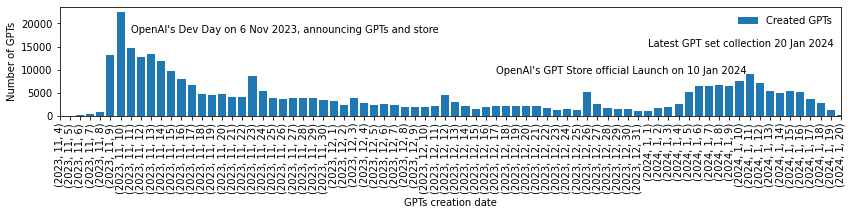

In [29]:
import matplotlib.pyplot as plt

plot_df = gpts_details['GPT Creation Datetime']
plot_df.name = 'Created GPTs'

plot_data = plot_df.groupby([plot_df.dt.year,
                       plot_df.dt.month, plot_df.dt.day]).count()


ax = plot_data.plot(kind='bar', figsize=(14,2), width=0.8)
plt.xticks(rotation=90)
ax.set_xlabel(f'GPTs creation date')
ax.set_ylabel('Number of GPTs')
plt.legend(frameon=False)
# info_text = f'Number of domains registered before {cutoff_year}: {pre_cut}'
# plt.text(0, 35, info_text)
plt.text(7, 18000, "OpenAI's Dev Day on 6 Nov 2023, announcing GPTs and store")

plt.text(43, 9000, "OpenAI's GPT Store official Launch on 10 Jan 2024")

plt.text(58, 15000, "Latest GPT set collection 20 Jan 2024")

plt.xlim(0, 77)

plt.savefig("plots/creation_dates.pdf", bbox_inches='tight')

## Authors

In [30]:
_df = gpts_authors['Author Name'].value_counts()

dumplicate_author_names = list(_df[(_df > 10)].index.values)

dumplicate_author_names

['Collins Scott',
 '1',
 'Catheryn',
 'Tom Jack',
 'Jun Yuan Lai',
 'Emily Smith',
 'Jay Liu',
 'xiaasdasd',
 'Leana Kris',
 'Jonathan',
 'Qinghuan Li',
 'jack Sin',
 'Amaniag',
 'JIE CHEN',
 'Willene Boyle',
 'MARQUEZBRAVO MAISBEL',
 'Kevin Ivery',
 'Zack Hudson',
 'Xiang George',
 'Beria Joey']

In [31]:
unique_authors = gpts_authors['Author Name'].unique()
unique_authors

array(['YI YING WU', 'DAICHI MURAOKA', 'SUN LIFA', ..., 'KEVIN ERIK IIN',
       'Josef Taha', 'HE SHITING'], dtype=object)

In [32]:
# !pip install validators

import validators

domain_holder = []
twitter_holder = []
author_name_holder = []
email_holder = []


for author in unique_authors:
    
    if author != author:
        author = 'None'

    is_domain = validators.domain(author)
    is_email = validators.email(author)
    is_twitter_handle = author[0] == '@'
    
    if is_domain:
        domain_holder.append(author)
    elif is_twitter_handle:
        twitter_holder.append(author)
    elif is_email:
        email_holder.append(author)
    else:
        author_name_holder.append(author)
        
print("Domains:", len(domain_holder))
print("Twitter Handles:", len(twitter_holder))
print("Emails", len(email_holder))
print("Names/Other:", len(author_name_holder))

Domains: 9596
Twitter Handles: 66
Emails 14
Names/Other: 111695


In [33]:
domain_holder

['ai-sns.com',
 'T.OKADA',
 'oometa.ai',
 'bookai.top',
 'assistant.ruoguedu.com',
 'zillion-ai.com',
 'gptpro.gapier.net',
 'printgenerator.net',
 'zttcldf.info',
 'taishokugaku.com',
 'gptlife.net',
 'yoihyouban.com',
 'yiheng.wangcarl.com',
 'oolong.io',
 'locoassi.com',
 'nagi.blog',
 'nullglyph.games',
 'runapp.today',
 'juliangoldie.com',
 'atcoder-blogs.jp',
 'legalnowai.com',
 'popularaitools.ai',
 'orbixai.com',
 'gakeez.top',
 'bytebrain.org',
 'uniart.io',
 'catsru.com',
 'intellipalsai.com',
 'awesomegpts.vip',
 'ikena.ai',
 'elushis.com',
 'themadkanin.com',
 'sevic.dev',
 'aimoneygen.com',
 'mtsprompts.com',
 'flowpoint-analytics.ai',
 'sharpagents.ai',
 'adzviser.com',
 'videovaas.com',
 'coffee4u.xyz',
 'ratio-lab.com',
 'gptfarmers.com',
 'whipgold.com',
 'sellcasa.com',
 'wmoto-ai.com',
 'nextmethod.ai',
 'wikihhc.com',
 'thelatitude.io',
 'xfy.com.tw',
 'corbinvking.com',
 'ada-software.com',
 'pcard.design',
 'botbiz.ai',
 'talkbeforewicket.com',
 'zhihebingshui.cn'

In [34]:
print('Number of LinkedIn listed:', sum(gpts_authors['Author LinkedIn'] == gpts_authors['Author LinkedIn']))
print('Number of sites listed:', sum(gpts_authors['Author Site'] == gpts_authors['Author Site']))
print('Number of twitter listed:', sum(gpts_authors['Author Twitter'] == gpts_authors['Author Twitter']))
print('Number of github listed:', sum(gpts_authors['Author GitHub'] == gpts_authors['Author GitHub']))

print('Number of email support listed (Unimportant)', sum(gpts_authors['Author Offers Email Support'] == gpts_authors['Author Offers Email Support']))

print('Number of website name declared (Unimportant)', sum(gpts_authors['Author Display Type'] == 'website'))


Number of LinkedIn listed: 1959
Number of sites listed: 17779
Number of twitter listed: 1264
Number of github listed: 925
Number of email support listed (Unimportant) 31473
Number of website name declared (Unimportant) 7551


In [35]:
gpts_authors

,Last crawled date,Author User Id,Author Organization Id,Author Workspace Id,Author Display Type,Author Name,Author Site,Author is Verified,Author LinkedIn,Author Twitter,Author GitHub,Author Offers Email Support
0,2024-03-19,user-kAET33Y2oFw3W9uPbApkY5Vs,org-cRUU4a4HU0Fm4gY6X7Sbufwr,NaN,name,YI YING WU,NaN,True,NaN,NaN,NaN,NaN
1,2024-03-19,user-ErhKsKEbPfUobtJgzPIK8avD,org-2JJnl5xfFm6d1c9FErrB1YQT,NaN,name,DAICHI MURAOKA,NaN,True,NaN,NaN,NaN,NaN
2,2024-03-19,user-5PFBhns8jwsLn8q2NjxVlHlu,org-amJiaVixRZYnbkDUmTBPJeVs,NaN,name,SUN LIFA,NaN,True,NaN,NaN,NaN,NaN
3,2024-03-19,user-HzSfwCYDx4RTPwKpFzPqTqsh,org-Td8tfAtosshkjZAQhujkDbZH,NaN,name,莊正旺,NaN,True,NaN,NaN,NaN,True
4,2024-03-19,user-gont0VML2GYv1Jx85FMQYAGh,org-pQjsaBu3DfewK0fhoQnKbJ7U,NaN,website,ai-sns.com,https://ai-sns.com,True,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
131031,2024-01-20,user-zmkvN6PrOAHYnQrd62H12AMB,org-oyvmjERYbsY8QbzRR9R8v1fn,NaN,name,Jesus Garcia,NaN,True,NaN,NaN,NaN,True
131032,2024-01-20,user-SG1w8fZAMdxZFuR9xBG3iWRd,org-LMyXvG7mYQrDjEnJOtLl2E8q,NaN,website,degree.no,https://degree.no,True,NaN,NaN,NaN,NaN
131033,2024-01-20,user-W1cQYE0Pvop2mUdID8x2KCP9,org-SpVo9pIhZasknHLSaecBpwD8,NaN,name,KEVIN ERIK IIN,NaN,True,NaN,NaN,NaN,NaN
131034,2024-01-20,user-DbEjvw6p10UThE2IISr9EDpF,org-tCprDPkAP6cWMK1oAiNgKOlB,NaN,name,Josef Taha,NaN,True,NaN,NaN,NaN,NaN
